In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib as mpl

# from helpers import cart2pol

%matplotlib inline
%run ~/Desktop/ChangminYu/complexeigen/helpers.py

Defining the transition matrix, a $50\times 50$ state space with uniform one-step transition probabilities, i.e., each state has equal probabilities transitioning into one of its adjacent states. Note that instead of simple NSEW, we define here that each state can transition into all of its adjacent states, e.g., a state in $(2, 2)$ location is able to move to any one of its $8$ adjacent states in one step with probability $1/8$.

In [79]:
def create_one_step_transition(N):
    T = np.zeros((N*N, N*N))
    for i in range(1, N-1):
        for j in range(1, N-1):
            T[N*i+j, N*i+j-1] = 1/8
            T[N*i+j, N*i+j+1] = 1/8
            T[N*i+j, N*(i-1)+j-1:N*(i-1)+j+2] = 1/8
            T[N*i+j, N*(i+1)+j-1:N*(i+1)+j+2] = 1/8
            
    T[0, 1], T[0, N], T[0, N+1] = 1/3, 1/3, 1/3
    T[N-1, N-2], T[N-1, 2*N-2], T[N-1, 2*N-1] = 1/3, 1/3, 1/3
    T[(N-1)*N, (N-1)*N+1], T[(N-1)*N, (N-2)*N], T[(N-1)*N, (N-2)*N+1] = 1/3, 1/3, 1/3
    T[-1, -2], T[-1, -(N+1)], T[-1, -(N+2)] = 1/3, 1/3, 1/3
    for i in range(1, N-1):
        T[i, i-1], T[i, i+1] = 1/5, 1/5
        T[i, (N+i-1):(N+i+2)] = 1/5
        T[-(i+1), -i]  = 1/5
        T[-(i+1), -(i+2)] = 1/5
        # T[-(i+1), -(i+1+N-1):-(i+1+N+2)] = 1/5
        T[-(i+1), -(i+1+N-1)] = 1/5
        T[-(i+1), -(i+1+N)] = 1/5
        T[-(i+1), -(i+1+N+1)] = 1/5
        T[N*i, N*i+1] = 1/5
        # T[N*i, ((N-1)*i):((N-1)*i+2)] = 1/5
        # T[N*i, ((N+1)*i):((N+1)*i+2)] = 1/5
        T[N*i, N*(i-1)], T[N*i, N*(i-1)+1], T[N*i, N*(i+1)], T[N*i, N*(i+1)+1] = 1/5, 1/5, 1/5, 1/5
        T[N*(i+1)-1, N*(i+1)-2] = 1/5
        # T[N*(i+1)-1, (N*i-2):(N*i)] = 1/5
        T[N*(i+1)-1, N*i-1], T[N*(i+1)-1, N*i-2] = 1/5, 1/5
        # T[N*(i+1)-1, ((N+2)*i-2):(N+2)*i] = 1/5
        T[N*(i+1)-1, N*(i+2)-1], T[N*(i+1)-1, N*(i+2)-2] = 1/5, 1/5
    # T[N, N+1] = 1/5
    # T[N, 0], T[N, 1] = 1/5, 1/5
    # T[N, 2*N], T[N, 2*N+1] = 1/5, 1/5
    return T

In [80]:
N = 50
T = create_one_step_transition(N)

In [81]:
eval1, evec1 = np.linalg.eig(T)

Get the principal eigenvector and visualise

In [82]:
principal_evec = evec1[:, 0].reshape((N, N))

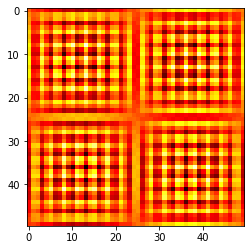

In [83]:
plt.imshow(np.real(principal_evec), cmap='hot')

Visualise the first $9$ eigenvectors

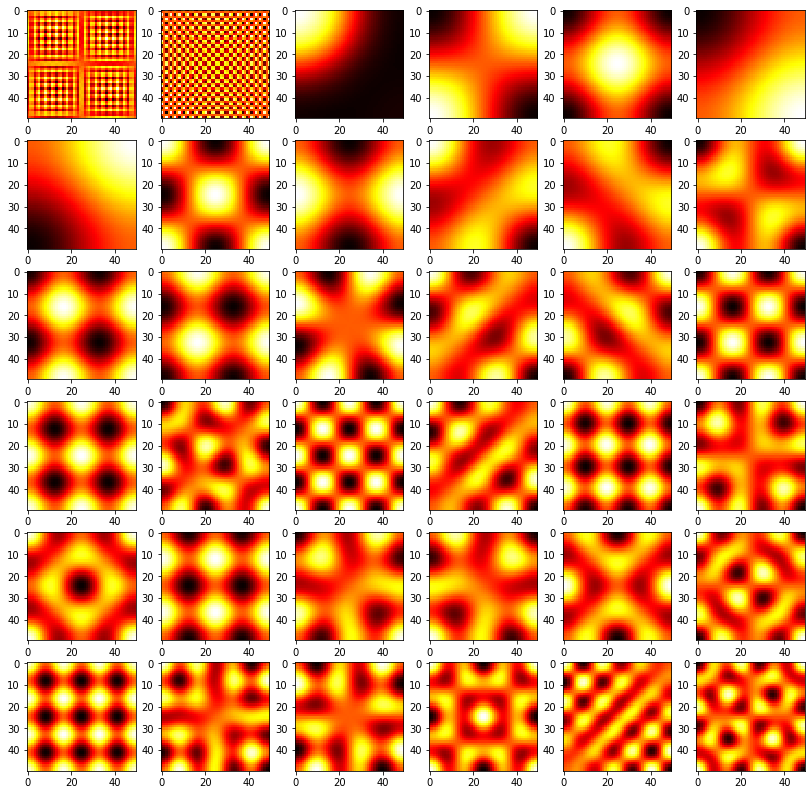

In [84]:
fig1, ax1 = plt.subplots(6, 6, figsize=(14, 14))
for i in range(6):
    for j in range(6):
        ax1[i, j].imshow(np.real(evec1[:, (6*i)+j].reshape((N, N))), cmap='hot')
fig1.savefig('evec1-9.pdf')

In [97]:
def gaussian_density(x, mean, var=10):
    return np.exp(-np.sum(np.square(x-mean))/(2*var))/np.sqrt(2*np.pi*var)

In [98]:
def place_fields(x, y, n, density):
    density_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            density_matrix[i, j] = density(np.array([i, j]), np.array([x, y]))
    return np.ndarray.flatten(density_matrix)

In [99]:
T_gaussian = np.zeros((N*N, N*N))

In [100]:
for i in range(N):
    for j in range(N):
        a = place_fields(i, j, N, density=gaussian_density)
        a = a/np.sum(a)
        T_gaussian[N*i+j, :] = a

In [101]:
np.allclose(np.sum(T_gaussian, axis=1), 1)

True

Compute the eigenvectors of the Gaussian transition matrix, still symmetric in this case

In [102]:
eval2, evec2 = np.linalg.eig(T_gaussian)

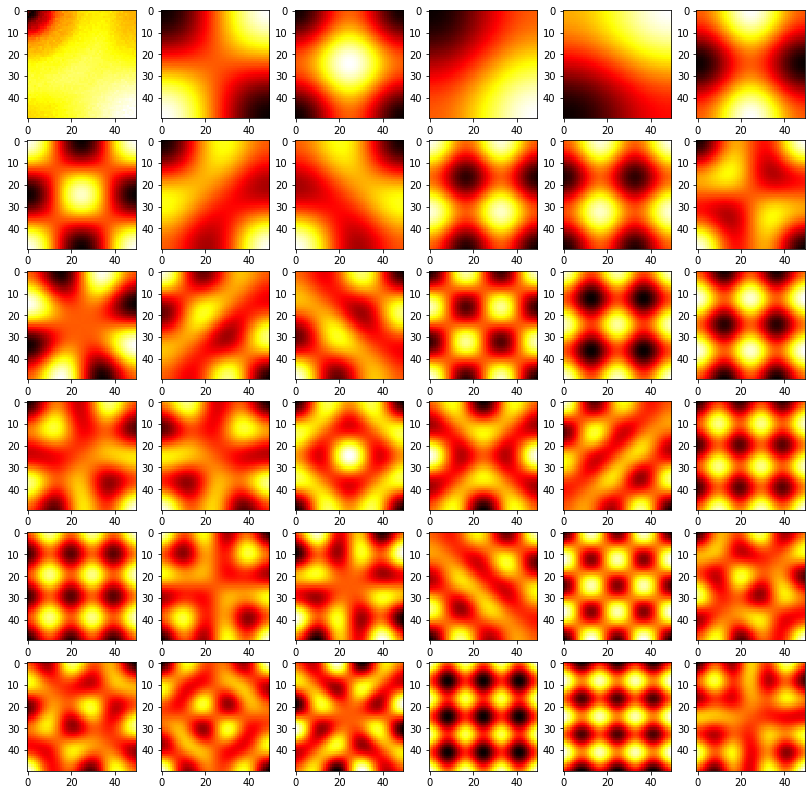

In [103]:
fig2, ax2 = plt.subplots(6, 6, figsize=(14, 14))
for i in range(6):
    for j in range(6):
        ax2[i, j].imshow(np.real(evec2[:, (6*i)+j].reshape((N, N))), cmap='hot')

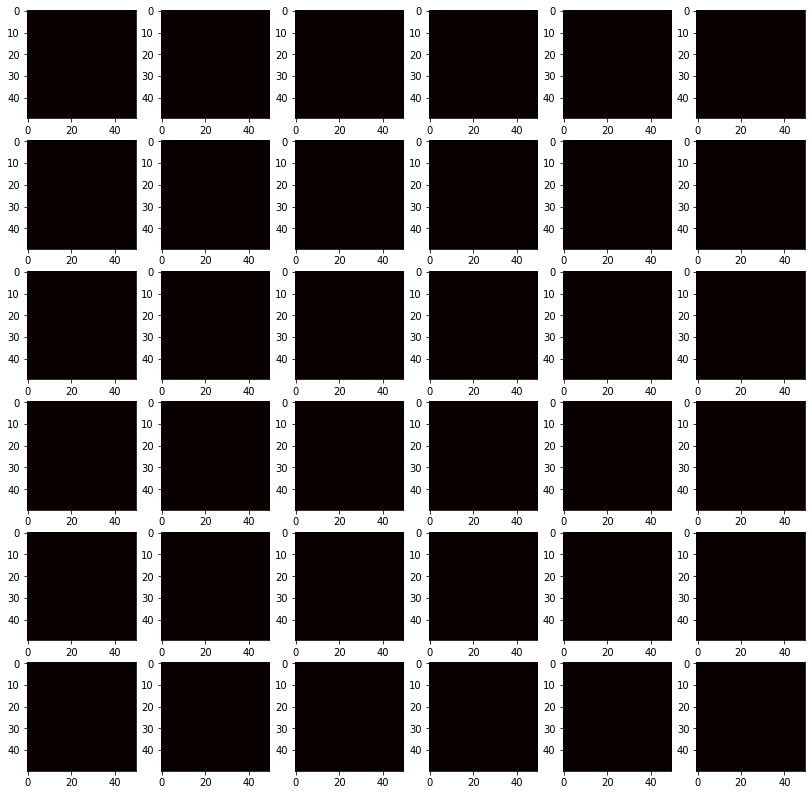

In [104]:
fig11, ax11 = plt.subplots(6, 6, figsize=(14, 14))
for i in range(6):
    for j in range(6):
        ax11[i, j].imshow(np.imag(evec2[:, (6*i)+j].reshape((N, N))), cmap='hot')

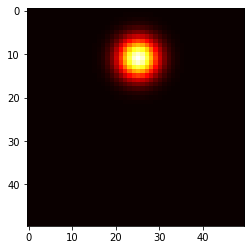

In [16]:
plt.imshow(T_gaussian[575, :].reshape((N, N)), cmap='hot')

Now we look at the real and imaginary parts of the asymmetric 2D transition matrix

In [17]:
T_gaussian_asymmetric = np.zeros((N*N, N*N))
for i in range(N):
    for j in range(N):
        a = place_fields(i, j, N, density=lambda x, y: gaussian_density(x, y, mean=20, var=40))
        a = a/np.sum(a)
        T_gaussian_asymmetric[N*i+j, :] = a

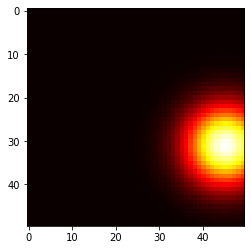

In [18]:
plt.imshow(T_gaussian_asymmetric[575, :].reshape((N, N)), cmap='hot')

In [19]:
eval3, evec3 = np.linalg.eig(T_gaussian_asymmetric)

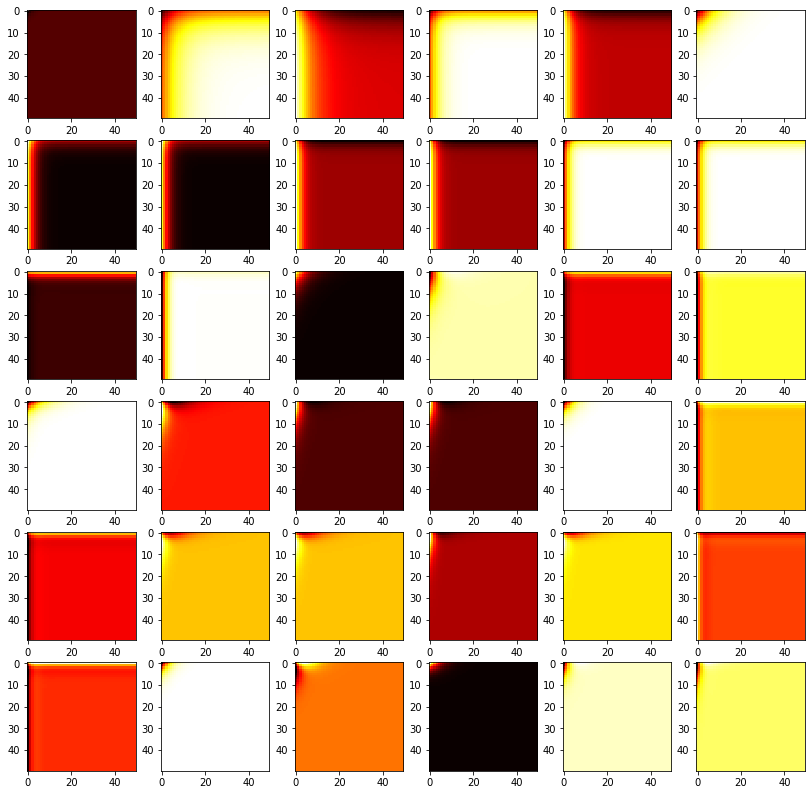

In [20]:
fig3, ax3 = plt.subplots(6, 6, figsize=(14, 14))
for i in range(6):
    for j in range(6):
        ax3[i, j].imshow(np.real(evec3[:, (6*i)+j].reshape((N, N))), cmap='hot')

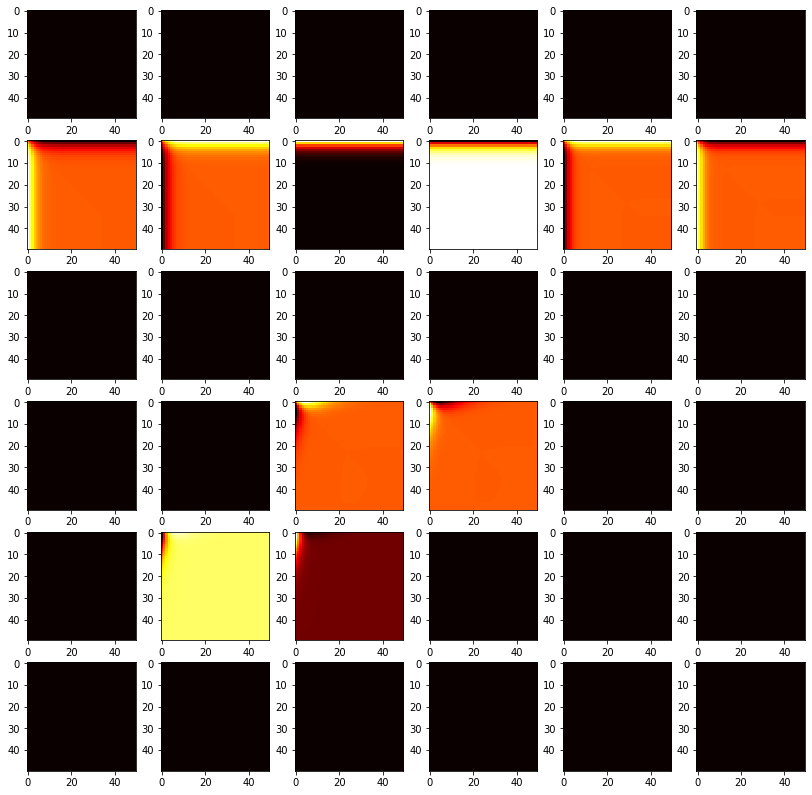

In [21]:
fig4, ax4 = plt.subplots(6, 6, figsize=(14, 14))
for i in range(6):
    for j in range(6):
        ax4[i, j].imshow(np.imag(evec3[:, (6*i)+j].reshape((N, N))), cmap='hot')

In [22]:
def cart2pol(x):
    real = np.real(x)
    imag = np.imag(x)
    r = np.sqrt(np.power(real, 2) + np.power(imag, 2))
    rho = np.arctan(imag/real)
    return r, rho

In [23]:
r7, rho7 = cart2pol(evec3[:, 7])

In [24]:
def phase_density_color_wheel(rho):
    # Generate a figure with a polar projection
    fg = plt.figure(figsize=(8,8))
    ax = fg.add_axes([0.1,0.1,0.8,0.8], projection='polar')

    # Define colormap normalization for 0 to 2*pi
    norm = mpl.colors.Normalize(0, 2*np.pi) 

    # Plot a color mesh on the polar plot
    # with the color set by the angle

    # n = 200  #the number of secants for the mesh
    # t = np.linspace(0,2*np.pi,n)   #theta values
    rho *= 2*np.pi
    r = np.linspace(.6,1,2)        #radius values change 0.6 to 0 for full circle
    rg, tg = np.meshgrid(r,rho)      #create a r,theta meshgrid
    c = tg                         #define color values as theta value
    im = ax.pcolormesh(rho, r, c.T,norm=norm)  #plot the colormesh on axis with colormap
    ax.set_yticklabels([])                   #turn of radial tick labels (yticks)
    ax.tick_params(pad=15,labelsize=24)      #cosmetic changes to tick labels
    ax.spines['polar'].set_visible(False)    #turn off the axis spine.

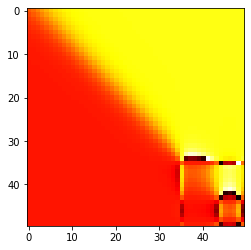

In [116]:
plt.imshow(rho7.reshape((N, N)), cmap='hot')

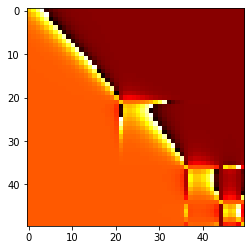

In [118]:
plt.imshow(rho8.reshape((N, N)), cmap='hot')

We do see some patterns above in terms of the range of phases the eigenvectors are looking at, but I need to improve on the above density plots using color wheel

Use the eigenvectors for planning, as we will see, the overall structure is preserved, but there is noise in the reconstruction and planning

In [27]:
def orthogonal_weights(T, init_pos=None):
    n = len(T)
    eval1, evec1 = np.linalg.eig(T)
    if not init_pos:
        init_pos = np.random.choice(n)
    init_place_field = T[init_pos, :]
    weights = np.zeros((n, ), dtype=np.complex128)
    for i in range(n):
        weights[i] = init_place_field.dot(np.conj(evec1[:, i]))
    return weights, init_pos, evec1, eval1

In [106]:
weights, init_pos, evec1, eval1 = orthogonal_weights(T)

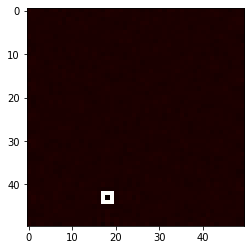

In [107]:
plt.imshow(np.real(np.sum(weights*evec1, axis=1).reshape((N, N))), cmap='hot')

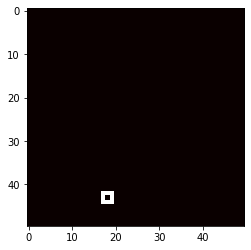

In [108]:
plt.imshow(T[init_pos, :].reshape((N, N)), cmap='hot')

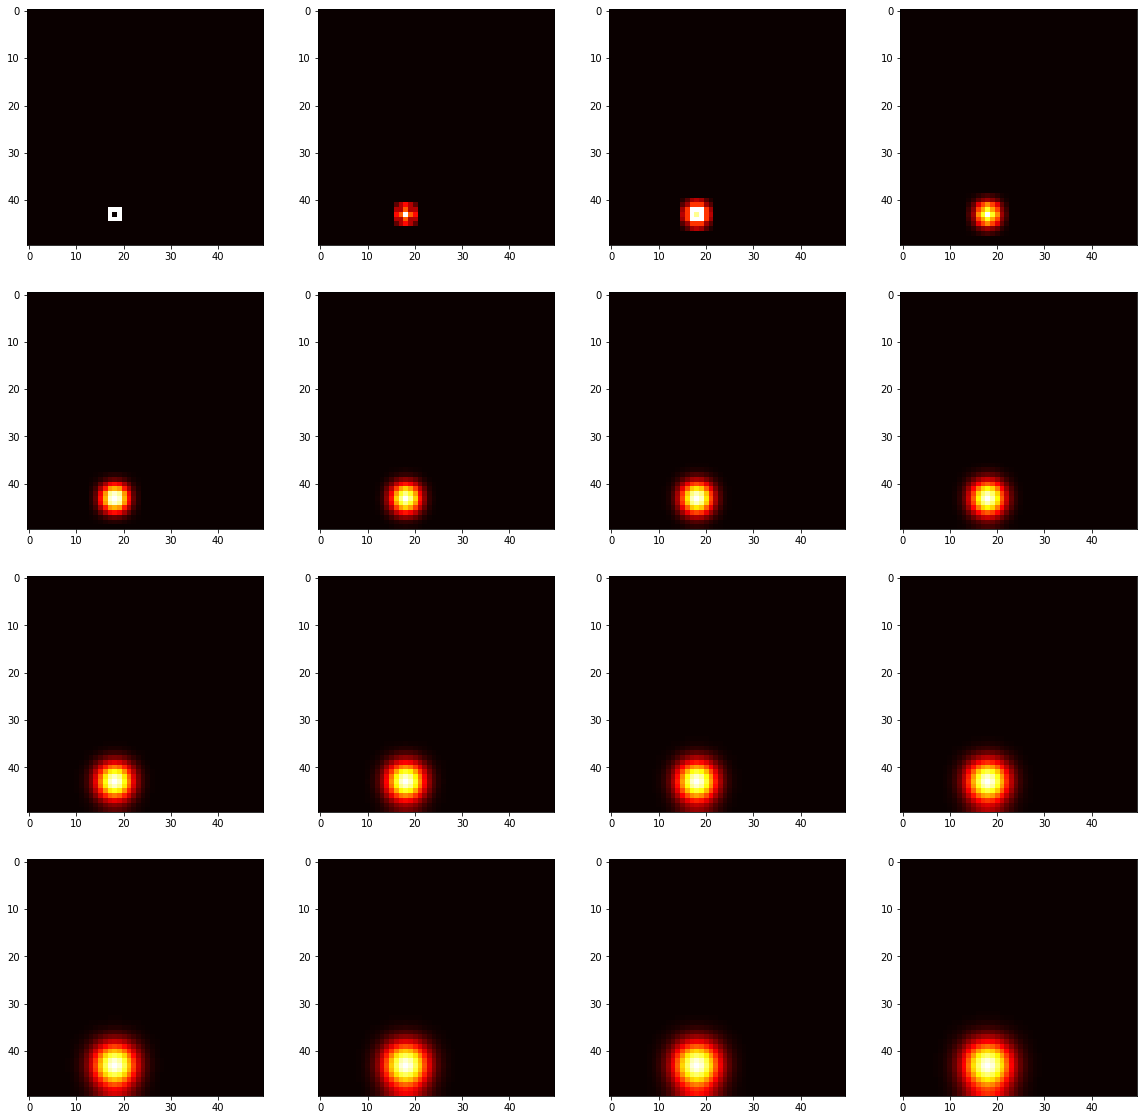

In [109]:
fig2, ax2 = plt.subplots(4, 4, figsize=(20, 20))
for i in range(4):
    for j in range(4):
        if i == 0 and j == 0:
            ax2[i, j].imshow(T[init_pos, :].reshape((N, N)), cmap='hot')
        else:
            ax2[i, j].imshow(np.sum(T[init_pos, :]*np.linalg.matrix_power(T, 4*i+j), axis=1).reshape((N, N)), cmap='hot')

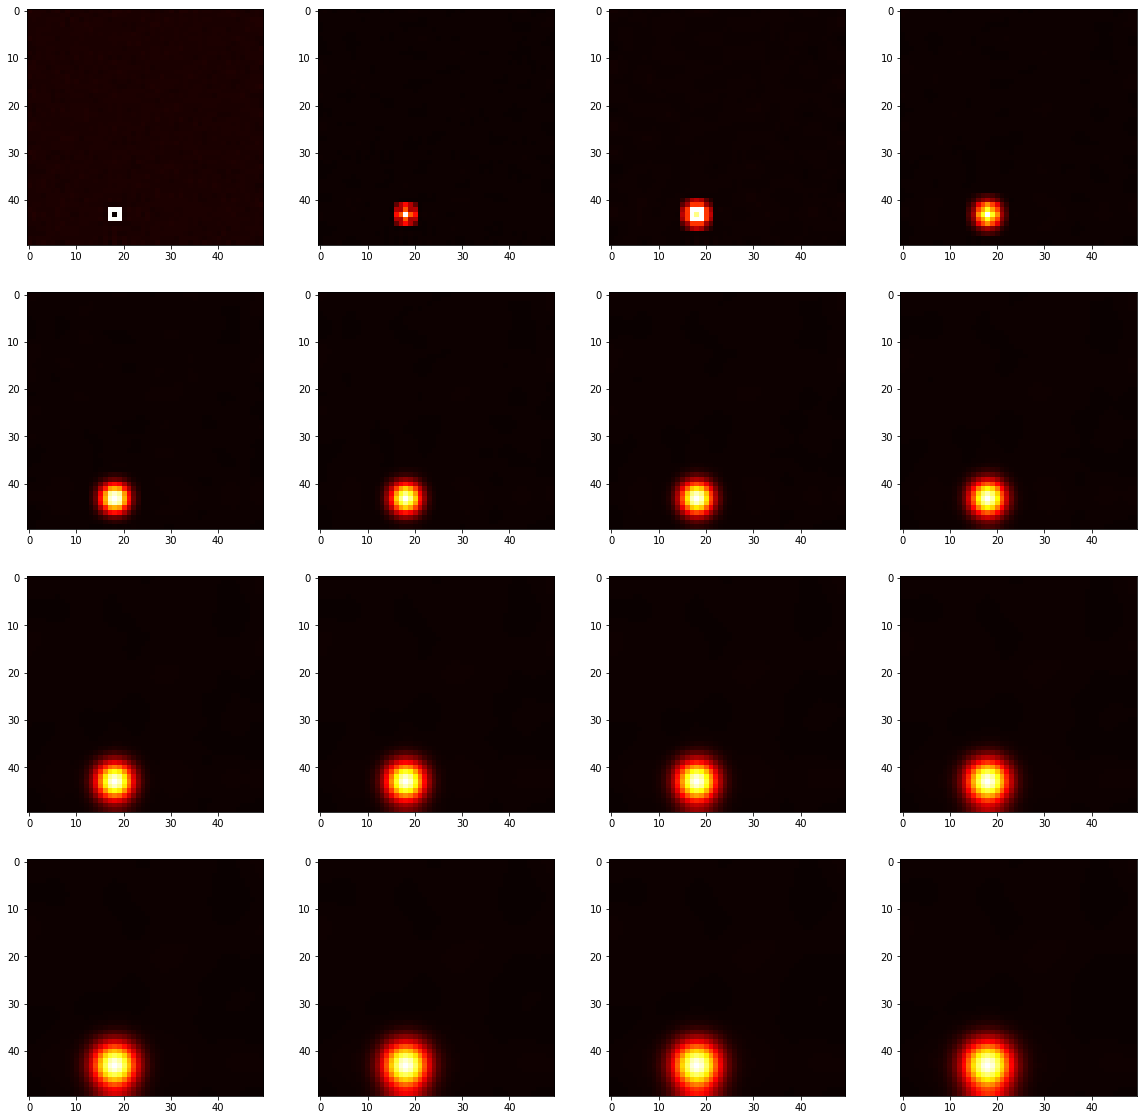

In [110]:
fig3, ax3 = plt.subplots(4, 4, figsize=(20, 20))
for i in range(4):
    for j in range(4):
        ax3[i, j].imshow(np.real(np.sum(np.power(eval1, 4*i+j)*weights*evec1, axis=1)).reshape((N, N)), cmap='hot')

Now if we wish to block (semi-block) say a whole column of the state space

In [111]:
blocked_column = 26
blocked_states = [N*i + blocked_column for i in range(5, N)]
T_50 = create_one_step_transition(50)

In [112]:
T_50[:, blocked_states] = 0
T_50 /= np.sum(T_50, axis=1)
T_50[blocked_states, :] = 0

In [113]:
eval_new, evec_new = np.linalg.eig(T_50)

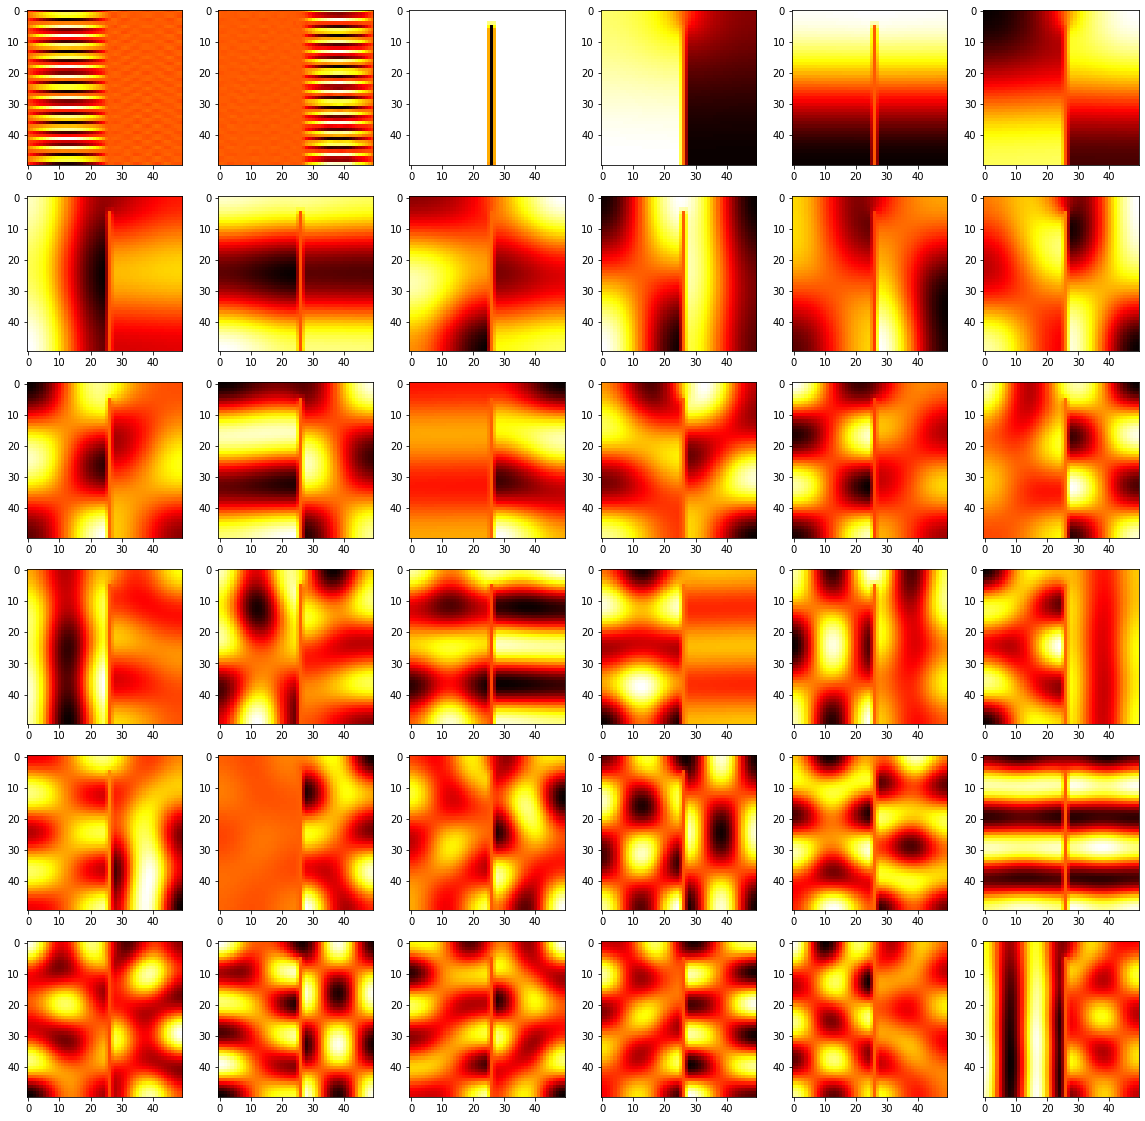

In [115]:
fig3, ax3 = plt.subplots(6, 6, figsize=(20, 20))
for i in range(6):
    for j in range(6):
        ax3[i, j].imshow(np.real(evec_new[:, 6*i+j]).reshape((N, N)), cmap='hot')